In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('home_loan.csv')

In [3]:
data.shape

(614, 13)

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data = data.drop('Loan_ID', axis = 1)

In [8]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.describe(include=['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [11]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

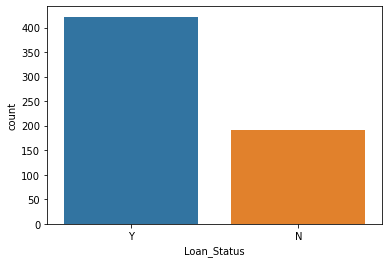

In [12]:
sns.countplot(data=data, x = 'Loan_Status')
plt.show()

In [13]:
data['TotalIncome'] = data['ApplicantIncome']  + data['CoapplicantIncome']

In [14]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<AxesSubplot:xlabel='TotalIncome'>

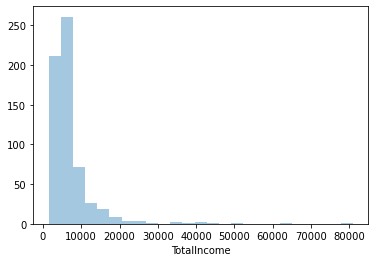

In [15]:
sns.distplot(data['TotalIncome'], bins = 25, kde = False)

In [16]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [17]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High


In [18]:
TotalIncome = pd.crosstab(data['TotalIncome_bin'], data['Loan_Status'])
TotalIncome

Loan_Status,N,Y
TotalIncome_bin,,
Low,14,10
Average,32,87
High,65,159
Very High,81,166


<AxesSubplot:xlabel='TotalIncome_bin'>

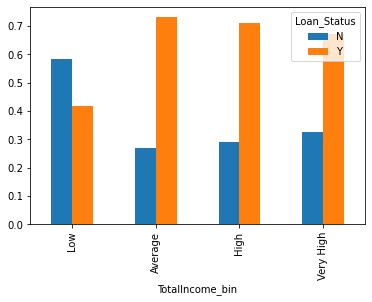

In [19]:
TotalIncome.div(TotalIncome.sum(axis=1), axis = 0).plot.bar()

## Loan Amount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

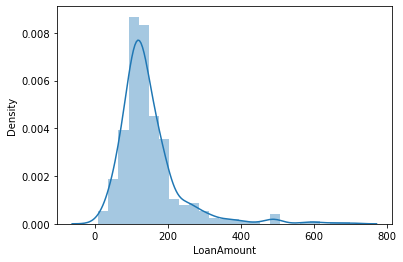

In [20]:
sns.distplot(data['LoanAmount'], bins = 25)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

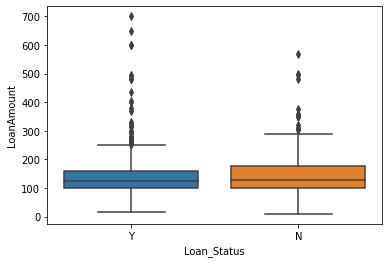

In [21]:
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount' , data = data)

# Loan Term

In [22]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [23]:
data['Loan_Amount_Term'] =data['Loan_Amount_Term']/12

In [24]:
data['Loan_Amount_Term']

0      30.0
1      30.0
2      30.0
3      30.0
4      30.0
       ... 
609    30.0
610    15.0
611    30.0
612    30.0
613    30.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

<AxesSubplot:>

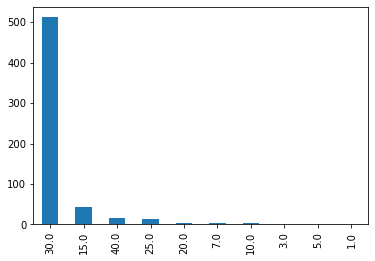

In [25]:
data['Loan_Amount_Term'].value_counts().plot.bar()

# Missing Data.

In [26]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(30.0)

In [27]:
data['Loan_Amount_per_year'] = data['LoanAmount'] / data['Loan_Amount_Term']

In [28]:
data['Loan_Amount_per_year']

0           NaN
1      4.266667
2      2.200000
3      4.000000
4      4.700000
         ...   
609    2.366667
610    2.666667
611    8.433333
612    6.233333
613    4.433333
Name: Loan_Amount_per_year, Length: 614, dtype: float64

<AxesSubplot:xlabel='Loan_Amount_per_year', ylabel='Density'>

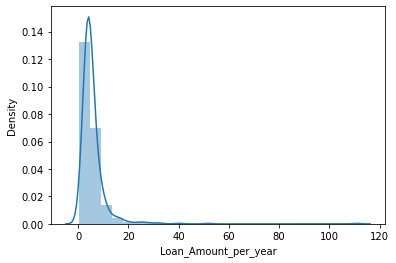

In [29]:
sns.distplot(data['Loan_Amount_per_year'], bins = 25)

In [30]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_bin,Loan_Amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,High,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,Very High,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,Average,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,High,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,High,4.700000


# EMI

## create a new column/feature for EMI

## Dependents

In [31]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# Categorical Variables

In [32]:
data['Dependents'] =data['Dependents'].replace(to_replace= '3+', value=3 ).astype('float')

In [33]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_bin,Loan_Amount_per_year
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,High,NaN
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,Very High,4.266667
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,Average,2.200000
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,High,4.000000
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,High,4.700000


In [34]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [35]:
data['Gender'] =data['Gender'].fillna('Other')

In [36]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

# Missing Data

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imputer = SimpleImputer(strategy='most_frequent')

In [39]:
data['Married'] = imputer.fit_transform(pd.DataFrame(data['Married']))

# OrdinalEncoding / Label Encoding - Ordinal Data

In [40]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [41]:
encoder = LabelEncoder()

In [42]:
data['Gender'] = encoder.fit_transform(data['Gender'])

In [43]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_bin,Loan_Amount_per_year
0,1,No,0.0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,High,NaN
1,1,Yes,1.0,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,Very High,4.266667
2,1,Yes,0.0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,Average,2.200000
3,1,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,High,4.000000
4,1,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,High,4.700000


In [44]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# OneHot Encoding - Nomial Data

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
ohe = OneHotEncoder()

In [47]:
ohe.fit_transform(pd.DataFrame(data['Property_Area'])).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [48]:
pd.get_dummies(data['Property_Area'], drop_first=True)

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,0
610,0,0
611,0,1
612,0,1


# Feature Transformation

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

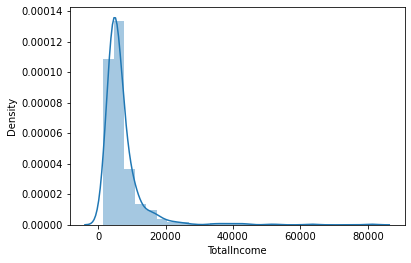

In [49]:
sns.distplot(data['TotalIncome'], bins = 25)

In [50]:
data['TotalIncome'].apply(np.log)

0      8.674026
1      8.714568
2      8.006368
3      8.505323
4      8.699515
         ...   
609    7.972466
610    8.320205
611    9.025456
612    8.933664
613    8.430109
Name: TotalIncome, Length: 614, dtype: float64

Text(0.5, 0, 'TOTAL INCOME (in log)')

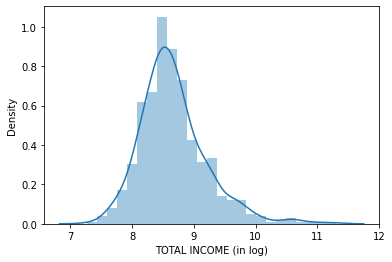

In [51]:
sns.distplot(data['TotalIncome'].apply(np.log), bins = 25)
plt.xlabel("TOTAL INCOME (in log)")

<AxesSubplot:xlabel='Loan_Amount_per_year'>

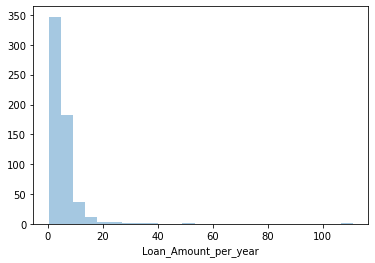

In [52]:
sns.distplot(data['Loan_Amount_per_year'], bins = 25, kde = False)

Text(0.5, 0, 'Loan Amount Per year INCOME (in log)')

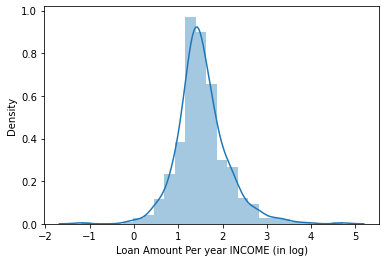

In [53]:
sns.distplot(data['Loan_Amount_per_year'].apply(np.log), bins = 25, )
plt.xlabel("Loan Amount Per year INCOME (in log)")

In [55]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_bin,Loan_Amount_per_year
0,1,No,0.0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,High,NaN
1,1,Yes,1.0,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,Very High,4.266667
2,1,Yes,0.0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,Average,2.200000
3,1,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,High,4.000000
4,1,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,High,4.700000


In [104]:
data['Married'] = data['Married'].astype('category').cat.codes

In [105]:
data['Education'] = data['Education'].astype('category').cat.codes

In [106]:
data['Property_Area'] = data['Property_Area'].astype('category').cat.codes

In [107]:
data['Loan_Status'] = data['Loan_Status'].astype('category').cat.codes

In [108]:
data['TotalIncome_bin'] = data['TotalIncome_bin'].astype('category').cat.codes

In [110]:
data['Self_Employed'] = data['Self_Employed'].astype('category').cat.codes

In [111]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_bin,Loan_Amount_per_year
0,1,0,0.0,0,0,5849,0.0,NaN,30.0,1.0,2,1,5849.0,2,NaN
1,1,1,1.0,0,0,4583,1508.0,128.0,30.0,1.0,0,0,6091.0,3,4.266667
2,1,1,0.0,0,1,3000,0.0,66.0,30.0,1.0,2,1,3000.0,1,2.200000
3,1,1,0.0,1,0,2583,2358.0,120.0,30.0,1.0,2,1,4941.0,2,4.000000
4,1,0,0.0,0,0,6000,0.0,141.0,30.0,1.0,2,1,6000.0,2,4.700000


In [60]:
def covariance(x, y):
    """
    inputs : x and y
    
    """
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    n = len(x) 
    cov = np.sum((x-x_bar)*(y-y_bar))/n
    
    return round(cov, 2)

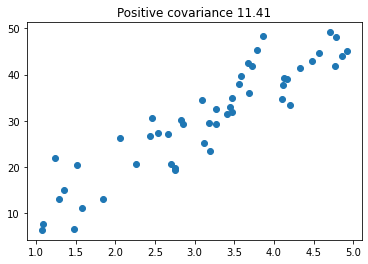

In [93]:
np.random.seed(0)

x1 = np.random.uniform(1, 5, size = 50)
y1 = 10*x1 + np.random.normal(scale= 5, size = 50)

plt.scatter(x1, y1)
plt.title("Positive covariance " + str(covariance(x1, y1)))
plt.show()

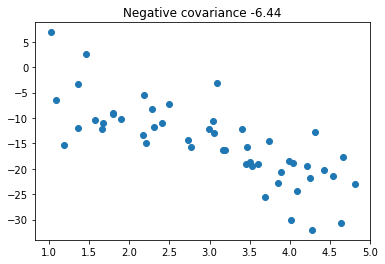

In [96]:
np.random.seed(10)

x2 = np.random.uniform(1, 5, size = 50)
y2 = -5*x2 + np.random.normal(scale= 5, size = 50)

plt.scatter(x2, y2)
plt.title("Negative covariance " + str(covariance(x2, y2)))
plt.show()

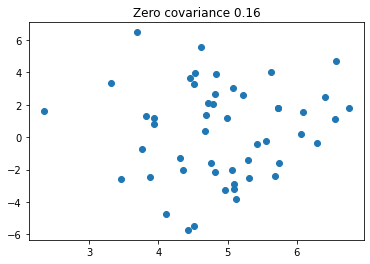

In [97]:
np.random.seed(11)

x3 = np.random.normal(5, 1, size = 50)
y3 = np.random.normal(0, scale = 3, size = 50)

plt.scatter(x3, y3)
plt.title("Zero covariance " + str(covariance(x3, y3)))
plt.show()

In [79]:
covariance(x2, x2)

1.47

In [80]:
covariance(5*x2, 5*x2)

36.64

## Pearson correlation coefficient

In [98]:
def correlation(x, y):
    cov = covariance(x, y)
    corr = cov/ (np.std(x)*np.std(y))
    
    return round(corr, 2)

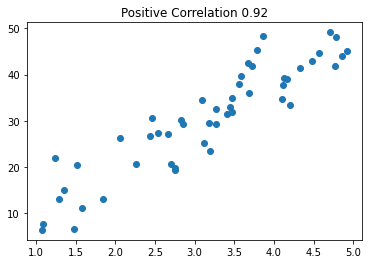

In [99]:
np.random.seed(0)

x1 = np.random.uniform(1, 5, size = 50)
y1 = 10*x1 + np.random.normal(scale= 5, size = 50)

plt.scatter(x1, y1)
plt.title("Positive Correlation " + str(correlation(x1, y1)))
plt.show()

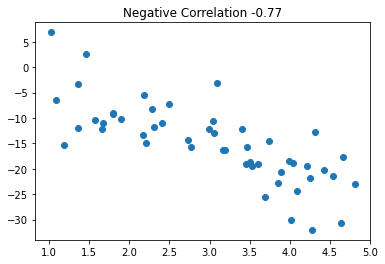

In [100]:
np.random.seed(10)

x2 = np.random.uniform(1, 5, size = 50)
y2 = -5*x2 + np.random.normal(scale= 5, size = 50)

plt.scatter(x2, y2)
plt.title("Negative Correlation " + str(correlation(x2, y2)))
plt.show()

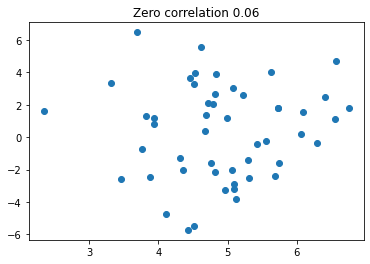

In [101]:
np.random.seed(11)

x3 = np.random.normal(5, 1, size = 50)
y3 = np.random.normal(0, scale = 3, size = 50)

plt.scatter(x3, y3)
plt.title("Zero correlation " + str(correlation(x3, y3)))
plt.show()

In [117]:
matrix = data.corr()
matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_bin,Loan_Amount_per_year
Gender,1.000000,0.346352,0.176492,0.024382,0.046235,0.094472,0.073308,0.137736,-0.068522,-0.000515,-0.030903,0.008690,0.122572,0.188821,0.073655
Married,0.346352,1.000000,0.343417,0.012304,0.027052,0.051708,0.075948,0.149743,-0.100912,0.006082,0.004257,0.091478,0.083319,0.194515,0.094022
Dependents,0.176492,0.343417,1.000000,0.059161,0.055693,0.118679,0.027259,0.163997,-0.102235,-0.050082,0.006828,0.006781,0.124597,0.059806,0.101037
Education,0.024382,0.012304,0.059161,1.000000,0.000820,-0.140760,-0.062290,-0.171133,-0.073928,-0.081822,-0.065243,-0.085884,-0.161362,-0.153837,-0.081170
Self_Employed,0.046235,0.027052,0.055693,0.000820,1.000000,0.092967,-0.052384,0.083761,-0.017729,-0.038374,-0.028730,-0.011332,0.064201,0.127850,0.033963
ApplicantIncome,0.094472,0.051708,0.118679,-0.140760,0.092967,1.000000,-0.116605,0.570909,-0.046531,-0.014715,-0.009500,-0.004710,0.893037,0.378548,0.324292
CoapplicantIncome,0.073308,0.075948,0.027259,-0.062290,-0.052384,-0.116605,1.000000,0.188619,-0.059383,-0.002056,0.010522,-0.059187,0.342781,0.288775,0.135536
LoanAmount,0.137736,0.149743,0.163997,-0.171133,0.083761,0.570909,0.188619,1.000000,0.036981,-0.008433,-0.045792,-0.037318,0.624621,0.521199,0.491795
Loan_Amount_Term,-0.068522,-0.100912,-0.102235,-0.073928,-0.017729,-0.046531,-0.059383,0.036981,1.000000,-0.003735,-0.076120,-0.022549,-0.070917,-0.039909,-0.501511
Credit_History,-0.000515,0.006082,-0.050082,-0.081822,-0.038374,-0.014715,-0.002056,-0.008433,-0.003735,1.000000,-0.001969,0.561678,-0.015109,0.000263,-0.000844


In [116]:
correlation(x3,x3)

1.01

<AxesSubplot:>

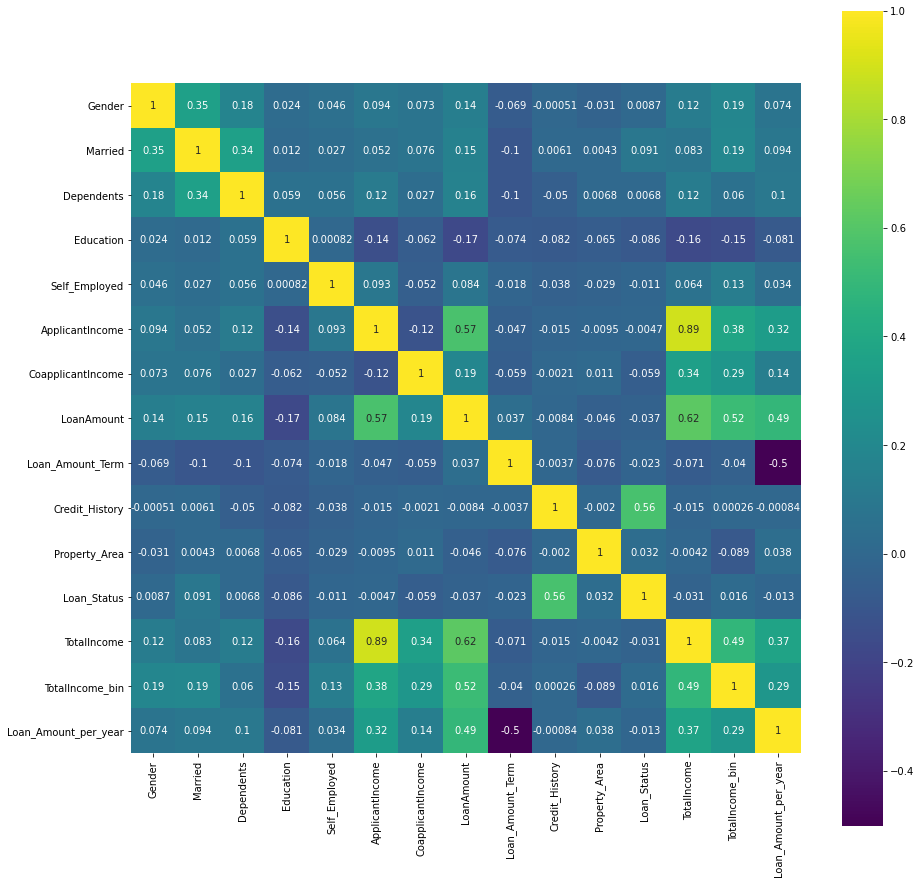

In [122]:
plt.figure(figsize=(15,15))
sns.heatmap(matrix, annot = True, square = True, cmap='viridis')

<AxesSubplot:ylabel='Density'>

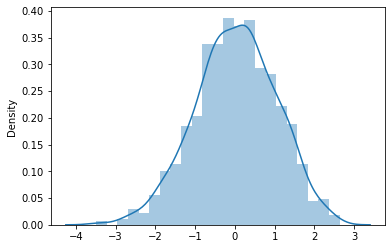

In [125]:
sns.distplot(np.random.normal(size = 1000))

# QQ Plot

In [126]:
from scipy import stats

In [129]:
heights = np.random.normal(loc=150, scale = 10, size = 1000)

In [164]:
a, b = stats.probplot(heights, dist='uniform') # distribution to check for? 'norm' for normal

In [165]:
x1, y1 = a

<AxesSubplot:>

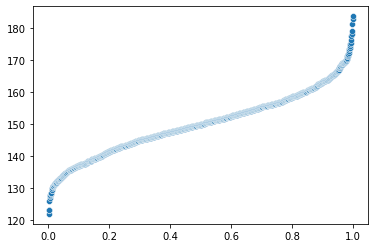

In [166]:
sns.scatterplot(x1, y1)